# Two-Athlete Strategy Example

This notebook demonstrates a simple quantum circuit to model a strategy involving two athletes:
- **Athlete 0** is less likely to win (20%).
- **Athlete 1** is more likely to win (80%).

The model uses rotation gates to encode their probabilities and a CNOT gate to simulate a strategy
where the stronger athlete helps the weaker one through quantum entanglement.


In [2]:
import numpy as np

from qiskit import transpile, QuantumCircuit
from qiskit.providers.basic_provider import BasicSimulator
from qiskit.visualization import plot_histogram

## Define winning probabilities

Convert classical win probabilities into quantum rotation angles using:
$\varphi = 2\arcsin(\sqrt{p})$

In [3]:
varphi0 = 2 * np.arcsin(np.sqrt(0.2))  # Athlete 0: 20% chance of winning
varphi1 = 2 * np.arcsin(np.sqrt(0.8))  # Athlete 1: 80% chance of winning

print(f"varphi0 (bad athlete): {varphi0}")
print(f"varphi1 (good athlete): {varphi1}")

varphi0 (bad athlete): 0.9272952180016122
varphi1 (good athlete): 2.214297435588181


## Create quantum circuit
- Apply `ry` rotations to encode each athlete's probability.
- Use a `cx` (CNOT) gate to simulate a support mechanism: Athlete 1 helps Athlete 0.
- Measure both qubits.

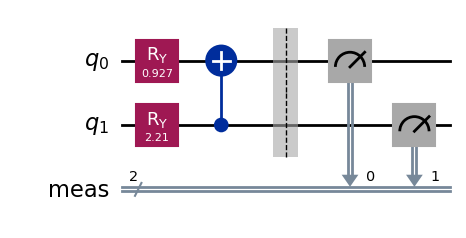

In [4]:
circuit = QuantumCircuit(2)
circuit.ry(varphi0, 0)  # Encode athlete 0's win probability
circuit.ry(varphi1, 1)  # Encode athlete 1's win probability
circuit.cx(1, 0)        # Entangle: athlete 1 helps athlete 0
circuit.measure_all()
circuit.draw('mpl')

## Run simulation

Use Qiskit's `BasicSimulator` to simulate the circuit.

In [5]:
backend = BasicSimulator()
transpiled_circuit = transpile(circuit, backend=backend)
job = backend.run(transpiled_circuit.reverse_bits(), shots=100000)
counts = job.result().get_counts()
print(counts)

{'11': 64007, '00': 15966, '01': 16096, '10': 3931}


## Visualize measurement results

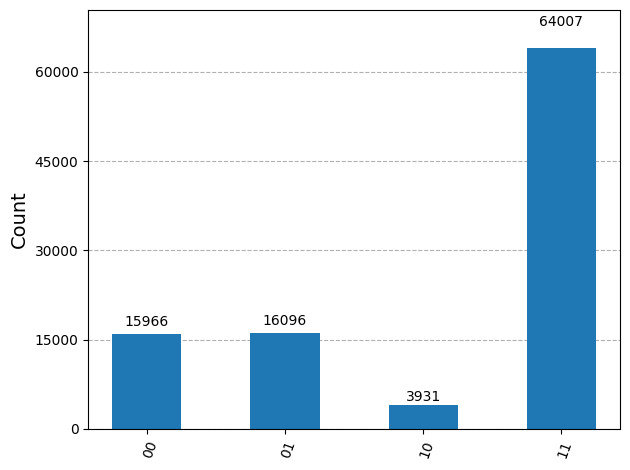

In [6]:
plot_histogram(counts)